In [56]:
#Machine Learning Techniques i will be using

# Regression - Overall Popularity Prediction: Predict the popularity of a book using features like ratings, sales rank, and publisher popularity. *

#Clustering - Author Similarity Clustering: Group similar authors together based on their writing styles or genre preferences. *

#Natural Language Processing (NLP) - Sentiment Analysis: Analyze user reviews to determine the sentiment (positive, negative, neutral) towards books. *

#Time Series Analysis:
    #Sales Forecasting: Predict future book sales based on historical sales data. *

#Anomaly Detection - Identify Outliers: Detect books with unusual patterns or behaviors, such as extremely high or low sales compared to similar books. *

#Reinforcement Learning - Dynamic Pricing: Optimize book prices based on market demand and sales data to maximize revenue.

#Collaborative Book Recommendation: Use user behavior (ratings, reviews) to recommend books to users based on preferences of similar users

In [57]:
# %pip install scikit-learn - # Provides tools for classification, regression, clustering, and more

# %pip install keras
    # Installing keras for building neural network models
    # High-level deep learning library for creating and training neural networks

# %pip install matplotlib - # Library for creating various types of plots and visualizations

# %pip install tensorflow
    # Installing tensorflow for deep learning (used by keras)
    # Deep learning framework for building and training neural networks

#%pip install scikit-learn imbalanced-learn matplotlib seaborn

#%pip install --upgrade scikit-learn
#%pip install --upgrade imbalanced-learn


In [58]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from dateutil import parser


In [59]:
df = pd.read_csv('book_data.csv')

In [60]:
# Preprocess 'Publisher Popularity' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Publisher Popularity'] = label_encoder.fit_transform(df['Publisher Popularity'])

#-------------------------------------------------------------------------------------------------------------------------------

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [61]:
# Regression - Overall Popularity Prediction
X_reg = train_df[['Rating Count', 'Amazon Sales Rank', 'Publisher Popularity']]
y_reg = train_df['Aggregate Rating']
regressor = LinearRegression()
regressor.fit(X_reg, y_reg)
predictions_reg = regressor.predict(test_df[['Rating Count', 'Amazon Sales Rank', 'Publisher Popularity']])
mse_reg = mean_squared_error(test_df['Aggregate Rating'], predictions_reg)
print("Mean Squared Error (Regression):", mse_reg)

Mean Squared Error (Regression): 0.08364239229845018


In [62]:
# Preprocessing the 'Authors' column to remove any leading/trailing spaces
train_df['Authors'] = train_df['Authors'].str.strip()

# Clustering - Author Similarity Clustering
unique_authors = train_df['Authors'].unique()

# Initializing a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the author strings to obtain TF-IDF features
author_strings = unique_authors.tolist()  # Convert to list for proper input
author_features = vectorizer.fit_transform(author_strings)

# Convert the sparse matrix to a list of arrays
author_features_list = author_features.toarray().tolist()

# Create a DataFrame to store author features
author_features_df = pd.DataFrame(author_features_list, columns=vectorizer.get_feature_names_out())

# Suppress the FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Continue with the clustering code
X_cluster = author_features_df  # Use the transformed features DataFrame for clustering
# Initialize KMeans with n_init explicitly set
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
author_features_df['Author Cluster'] = kmeans.fit_predict(X_cluster)

# Create a DataFrame from cluster counts
cluster_counts = author_features_df['Author Cluster'].value_counts().sort_index()
cluster_counts_df = pd.DataFrame({'Cluster': cluster_counts.index, 'Authors Count': cluster_counts.values})
cluster_counts_df['Cluster'] = 'Cluster ' + cluster_counts_df['Cluster'].astype(str)
cluster_counts_df = cluster_counts_df[['Cluster', 'Authors Count']]

# Display the DataFrame using display
with pd.option_context('display.colheader_justify', 'center'), pd.option_context('display.precision', 0):
    styles = [
        dict(selector="th", props=[("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")]),
        dict(selector="tr:hover td", props=[("background-color", "#ffffb3")])
    ]
    
    cluster_counts_style = cluster_counts_df.style.set_table_styles(styles).set_caption("")  # Set empty caption to remove index
    display(cluster_counts_style)

,Cluster,Authors Count
0,Cluster 0,202
1,Cluster 1,17
2,Cluster 2,787


Sentiment Analysis Classification Report:
               precision    recall  f1-score   support

       Happy       0.33      0.05      0.09       114
     Neutral       0.47      0.93      0.62       175
         Sad       0.00      0.00      0.00        79

    accuracy                           0.46       368
   macro avg       0.27      0.33      0.24       368
weighted avg       0.33      0.46      0.32       368

Cross-Validation Scores: [0.4701087  0.4701087  0.48501362 0.47138965 0.46594005]
Mean CV Score: 0.47251214311100576


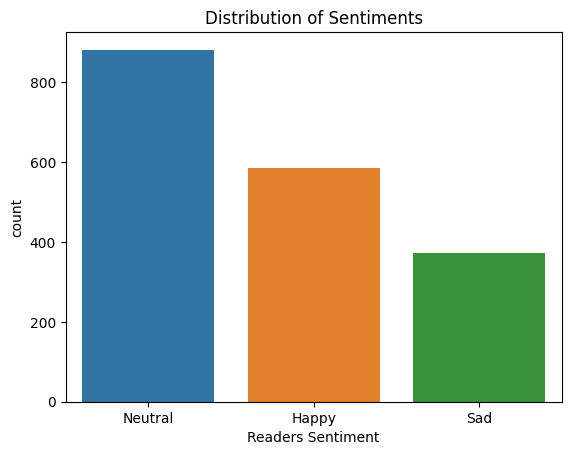

In [63]:
# Preprocess NaN values in 'Description' column
train_df['Description'] = train_df['Description'].fillna('')  # Replace NaN with an empty string

# NLP - Sentiment Analysis*
vectorizer = TfidfVectorizer()
X_nlp = vectorizer.fit_transform(train_df['Description'])
y_nlp = train_df['Readers Sentiment']
X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(X_nlp, y_nlp, test_size=0.2, random_state=42)
model_nlp = LogisticRegression()
model_nlp.fit(X_train_nlp, y_train_nlp)
y_pred_nlp = model_nlp.predict(X_test_nlp)
print("Sentiment Analysis Classification Report:\n", classification_report(y_test_nlp, y_pred_nlp))


# Cross-validation*
cv_scores = cross_val_score(model_nlp, X_nlp, y_nlp, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Visualization*
sns.countplot(x=y_nlp)
plt.title("Distribution of Sentiments")
plt.show()


In [64]:
# Anomaly Detection
X_anomaly = train_df[['Amazon Count']]
outlier_detector = IsolationForest(contamination=0.1, n_jobs=-1)

train_df['Outlier'] = outlier_detector.fit_predict(X_anomaly)

train_df['Outlier'] = train_df['Outlier'].map({1: 'Normal', -1: 'Anomaly'})

display(train_df['Outlier'].value_counts())

# Filter the DataFrame to get normal and anomaly records
normal_records = train_df[train_df['Outlier'] == 'Normal']
anomaly_records = train_df[train_df['Outlier'] == 'Anomaly']

warnings.filterwarnings("ignore", category=UserWarning)

# Display only specific columns for normal records
print("Normal Records:")
display(normal_records[['ID', 'Title', 'Amazon Count', 'Amazon Price', 'Publisher']])

# Display only specific columns for anomaly records
print("Anomaly Records:")
display(anomaly_records[['ID', 'Title', 'Amazon Count', 'Amazon Price', 'Publisher']])


Outlier
Normal     1665
Anomaly     172
Name: count, dtype: int64

Normal Records:


,ID,Title,Amazon Count,Amazon Price,Publisher
923,9.780000e+12,Birds Nature Activity Book: Educational Games ...,5,6.72,Waterford Press
942,9.780000e+12,Not All Sunshine and Sand: The Tales of a UK-M...,3,0.00,Old Pond Publishing
678,9.780000e+12,"Above All, Don't Look Back (CARAF Books: Carib...",11,64.99,University of Virginia Press
299,9.780000e+12,"Applelonia, I Like to Read: How It All Started...",1,0.00,Sherry McGee
306,9.780000e+12,Couples and All in the Game - Two Books in One,0,0.00,Omega Publications
...,...,...,...,...,...
1638,9.780000e+12,Lacy Sunshine's For The Love of Rory Greatest ...,6,8.99,Unknown
1095,9.780000e+12,They Once Had It All: Natural Resources of Anc...,5,17.08,Baby Professor
1130,9.790000e+12,Large Print: Aesops Fables All Time Favourite ...,19,15.55,OM BOOKS INTERNATIONAL
1294,9.780000e+12,Bibliographia Zoologiae Et Geologiae: A Genera...,2,0.00,Nabu Press


Anomaly Records:


,ID,Title,Amazon Count,Amazon Price,Publisher
210,9.780000e+12,We All Go Traveling By (Barefoot Books Singalo...,42,12.08,BAREFOOT BOOKS+
2176,9.780000e+12,The Baby Whisperer Solves All Your Problems: S...,51,6.99,Atria
361,9.780000e+12,All About Evergreens,61,1.75,Ortho Books
296,9.780000e+12,Ortho's All About Vegetables (Ortho's All Abou...,56,1.00,Ortho
1175,9.780000e+12,3 Books in 1: Rival Crock Pot (Slow Cooker Fav...,90,0.99,"Publications, International, Ltd."
...,...,...,...,...,...
1955,9.780000e+12,"Woof! The Truth About Dogs| Full of Fun Facts,...",44,9.27,Reycraft Books
1297,9.780000e+12,"The Everything College Survival Book, 2nd Edit...",30,6.75,JG Press
1215,9.780000e+12,GED Preparation 2019 All Subjects: GED Study G...,35,2.61,Test Prep Books
2135,9.780000e+12,A Right Royal Sprout - Christmas Story Books f...,32,5.48,Puppy Dogs &Ice Cream


Total Sales till 2023: $20625.71
Total Forecasted Sales from 2024 to 2035: $0.00670


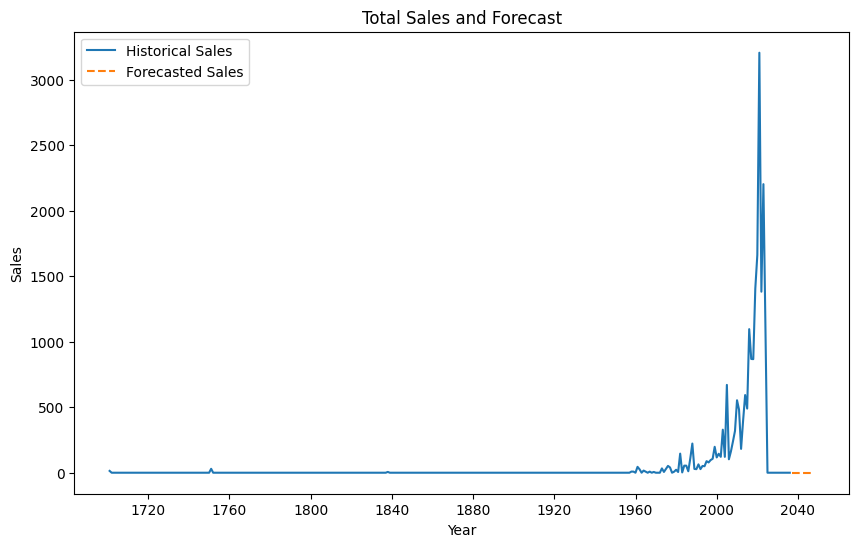

In [65]:
#Time Series Analysis - Sales Forecasting

# Clean and preprocess the 'Published Date' column
df['Published Date'] = df['Published Date'].str.replace('/', '-')  # Replace '/' with '-'
df['Published Date'] = df['Published Date'].str.replace('.', '-')  # Replace '.' with '-'

# Convert the 'Published Date' column to a datetime format using dateutil
df['Published Date'] = df['Published Date'].apply(parser.parse)

# Extract relevant columns for time series analysis
time_series_data = df[['Published Date', 'Amazon Price']]

# Set the 'Published Date' column as the index
time_series_data.set_index('Published Date', inplace=True)

# Resample the data to aggregate by year and calculate total sales
total_sales = time_series_data.resample('Y').sum()

# Display the total sales till the current year
current_year = datetime.now().year
total_sales_till_current_year = total_sales.loc[:str(current_year)].sum()
print(f"Total Sales till {current_year}: ${total_sales_till_current_year['Amazon Price']:.2f}")

# Perform sales forecasting using Exponential Smoothing
model = ExponentialSmoothing(total_sales)
fit_model = model.fit()

# Define the forecast range
forecast_start_year = current_year + 1  # Start from the next year
forecast_end_year = current_year + 12    # Forecast for the next 3 years
forecast_range = fit_model.forecast(steps=forecast_end_year - forecast_start_year + 1)

# Display the forecasted sales for the specified range
forecasted_total_sales = forecast_range.sum()
print(f"Total Forecasted Sales from {forecast_start_year} to {forecast_end_year}: ${forecasted_total_sales:.5f}")

# Plot the historical sales and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(total_sales.index, total_sales['Amazon Price'], label='Historical Sales')
plt.plot(forecast_range.index, forecast_range, label='Forecasted Sales', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales and Forecast')
plt.legend()
plt.show()

In [66]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Description"].fillna(""))

# Calculate the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get book recommendations based on book similarities
def get_book_recommendations(book_title, num_recommendations=5):
    book_idx = df[df["Title"] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim[book_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    book_indices = [i[0] for i in sim_scores]
    recommended_books = df["Title"].iloc[book_indices]
    return recommended_books

# Example usage
book_title = "All Aboard Airplanes (All Aboard Books)"
recommendations = get_book_recommendations(book_title, num_recommendations=10)
print("Recommended Books:")
for idx, book_title in enumerate(recommendations, start=1):
    print(f"{idx}. {book_title}")

Recommended Books:
1. All Aboard (Golden Books)
2. Go, Dog. Go! (Turtleback School & Library Binding Edition) (I Can Read It All by Myself Beginner Books (Hardcover))
3. Cars, Planes & More-An Adult Coloring & Activity Book: A adult coloring book featuring classic cars, planes and more (Spry Mind-Coloring And Activity Books For Adults Of All Ages)
4. Freddie Prinze Jr.: He's All That (Laurel-Leaf Books)
5. Reach A (Talk Together Label Books): All Kinds of Family (Reach for Reading)
6. Ellen Degeneres Upclose: The All-Holds Unbarred Unauthorized Biography
7. The New Nation, Liberty for All: Elementary Grades Student Study Guide, a History of Us: Student Study Guide Pairs with a History of Us Books Four and Five (History of US (Paperback))
8. Fantasy Writers' Phrase Book: Essential Reference for All Authors of Fantasy Adventure and Medieval Historical Fiction (Writers' Phrase Books)
9. We All Got History:: The Memory Books of Amos Webber
10. All About Cats And Kittens (Turtleback School 